In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from IWLS import IWLS, adaptive_IWLS, margin, first_order

# general parameters
n, k = 50, 5
job_n = 50

# (1, 0.5), (41, 0.5), (61, 0.5), (42, 0.5), (46, 0.5)
seed = 41
cov_str = 0.5

target = "probability"
np.random.seed(seed)

In [2]:
# generate data
mean_n = np.array([-1, 0])
mean_p = np.array([1, 0])
cov = np.eye(2) * cov_str  
x_n = np.random.multivariate_normal(mean_n, cov, int(n/2))
x_p = np.random.multivariate_normal(mean_p, cov, int(n/2))

y_n = np.zeros(int(n/2)) # 0 labels
y_p = np.ones(int(n/2))  # 1 labels

X_train = np.vstack((x_n, x_p))
y_train = np.hstack((y_n, y_p))

# Choose mean_n or mean_p wp 1/2
if np.random.rand() < 0.5:
	x_test = np.random.multivariate_normal(mean_n, cov)
	y_test = -1
else:
	x_test = np.random.multivariate_normal(mean_p, cov)
	y_test = 1

logistic_classifier = LogisticRegression(penalty=None).fit(X_train, y_train)

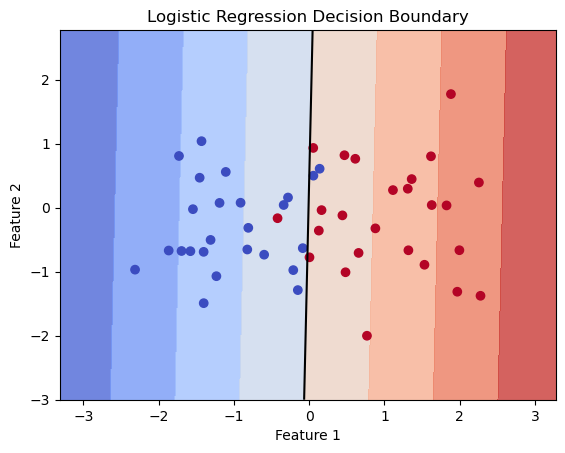

In [3]:
# Plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                    np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))
Z = logistic_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.contour(xx, yy, Z, colors='black', linestyles='-', levels=[0])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Plot

In [4]:
def most_influential_subset_plot(logistic_classifier, x_test, y_test, k, best_k_subset):
    # Train a Logistic Regression classifier on the reduced training set
    reduced_logistic_classifier = LogisticRegression(penalty=None)
    reduced_X_train = np.delete(X_train, best_k_subset, axis=0)
    reduced_y_train = np.delete(y_train, best_k_subset, axis=0)
    reduced_logistic_classifier.fit(reduced_X_train, reduced_y_train)
    reduced_Z = reduced_logistic_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    print(f"Best Subset of Removed Data Points for Parameter Changes with Size {k}: {best_k_subset}")
    # Plot the decision boundary of the original model and the reduced model, and mark the test point
    plt.figure()

    # Plot the decision boundary of the reduced model (solid line)
    plt.contourf(xx, yy, reduced_Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.contour(xx, yy, reduced_Z, colors='black', linestyles='-', levels=[0])

    # Plot the decision boundary of the original model (dashed line)
    original_Z = logistic_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contour(xx, yy, original_Z, colors='black', linestyles='--', levels=[0])

    # Mark the dataset points with a marker ('o' symbol)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, marker='o')

    # Mark the test point with a marker ('x' symbol)
    plt.scatter(x_test[0], x_test[1], c=y_test, marker='x', s=100, label="Test Point")
    
    # Mark the best subset of removed data points with a different marker ('^' symbol)
    best_subset_points = np.take(X_train, best_k_subset, axis=0).reshape(-1, 2)
    plt.scatter(best_subset_points[:, 0], best_subset_points[:, 1], c='g', marker='^', s=100, label="Best Subset")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary with Removal Size {k}')
    plt.legend()
    plt.show()

In [5]:
# Best Subset
best_k_subset = [0, 1, 2, 19, 35]

# IWLS
IWLS_best = IWLS(X_train, y_train, x_test)

# Adaptive IWLS
adaptive_IWLS_best_k = adaptive_IWLS(X_train, y_train, x_test, k=k, target=target)

# Margin-based approach
y_train = np.hstack((-np.ones(int(n/2)), y_p))
ind_n, ind_p = margin(X_train, y_train)

# First-order method
FO_best = first_order(X_train, y_train, x_test, y_test)

/home/pbb/Project/Influential-Subset/IWLS.py:142: RuntimeWarning: invalid value encountered in divide
  y = np.dot(X, coef) + (y_copy - p_copy) / W


Best Subset of Removed Data Points for Parameter Changes with Size 5: [0, 1, 2, 19, 35]


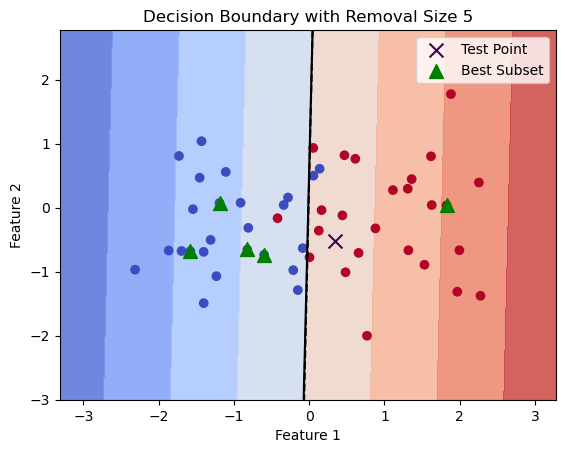

In [6]:
most_influential_subset_plot(logistic_classifier, x_test, y_test, k, best_k_subset)